# Univariate plotting with pandas

<table>
<tr>
<td><img src="https://i.imgur.com/skaZPhb.png" width="350px"/></td>
<td><img src="https://i.imgur.com/gaNttYd.png" width="350px"/></td>
<td><img src="https://i.imgur.com/pampioh.png"/></td>
<td><img src="https://i.imgur.com/OSbuszd.png"/></td>

<!--<td><img src="https://i.imgur.com/ydaMhT1.png" width="350px"/></td>
<td><img src="https://i.imgur.com/WLAqDSV.png" width="350px"/></td>
<td><img src="https://i.imgur.com/Tj2y9gH.png"/></td>
<td><img src="https://i.imgur.com/X0qXLCu.png"/></td>-->
</tr>
<tr>
<td style="font-weight:bold; font-size:16px;">Bar Chat</td>
<td style="font-weight:bold; font-size:16px;">Line Chart</td>
<td style="font-weight:bold; font-size:16px;">Area Chart</td>
<td style="font-weight:bold; font-size:16px;">Histogram</td>
</tr>
<tr>
<td>df.plot.bar()</td>
<td>df.plot.line()</td>
<td>df.plot.area()</td>
<td>df.plot.hist()</td>
</tr>
<tr>
<td>Good for nominal and small ordinal categorical data.</td>
<td>	Good for ordinal categorical and interval data.</td>
<td>Good for ordinal categorical and interval data.</td>
<td>Good for interval data.</td>
</tr>
</table>

----

The `pandas` library is the core library for Python data analysis: the "killer feature" that makes the entire ecosystem stick together. However, it can do more than load and transform your data: it can visualize it too! Indeed, the easy-to-use and expressive pandas plotting API is a big part of `pandas` popularity.

In this section we will learn the basic `pandas` plotting facilities, starting with the simplest type of visualization: single-variable or "univariate" visualizations. This includes basic tools like bar plots and line charts. Through these we'll get an understanding of `pandas` plotting library structure, and spend some time examining data types.

In [1]:
import pandas as pd
reviews = pd.read_csv("/content/winemag-data_first150k.csv")
reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [ ]:
reviews.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [ ]:
len(reviews.columns)

11

In [ ]:
reviews.shape

(150930, 11)

In [ ]:
reviews.dtypes

,0
Unnamed: 0,int64
country,object
description,object
designation,object
points,int64
price,float64
province,object
region_1,object
region_2,object
variety,object


## Bar charts and categorical data

Bar charts are arguably the simplest data visualization. They map categories to numbers: the amount of eggs consumed for breakfast (a category) to a number breakfast-eating Americans, for example; or, in our case, wine-producing provinces of the world (category) to the number of labels of wines they produce (number):

In [2]:
reviews['province']

,province
0,California
1,Northern Spain
2,California
3,Oregon
4,Provence
...,...
150925,Southern Italy
150926,Champagne
150927,Southern Italy
150928,Champagne


In [3]:
reviews['province'].value_counts()

,count
province,
California,44508
Washington,9750
Tuscany,7281
Bordeaux,6111
Northern Spain,4892
...,...
Pafos,1
Central Otago-Marlborough,1
Maipo Valley-Colchagua Valley,1


<Axes: xlabel='province'>

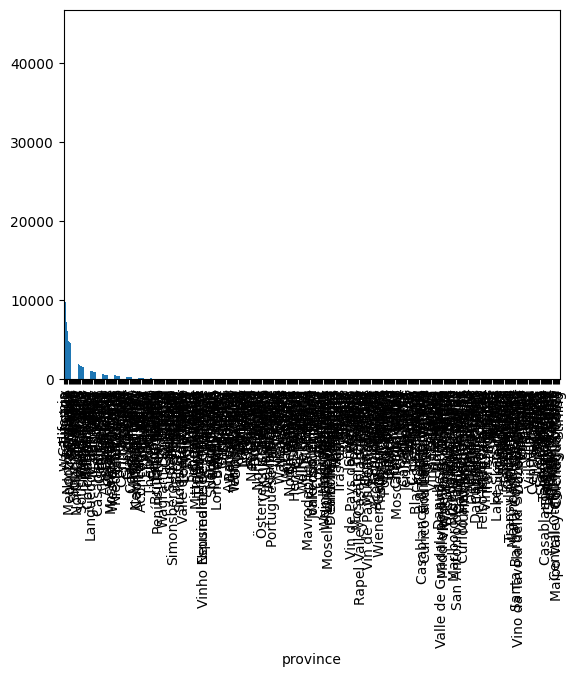

In [4]:
reviews['province'].value_counts().plot.bar()

<Axes: xlabel='province'>

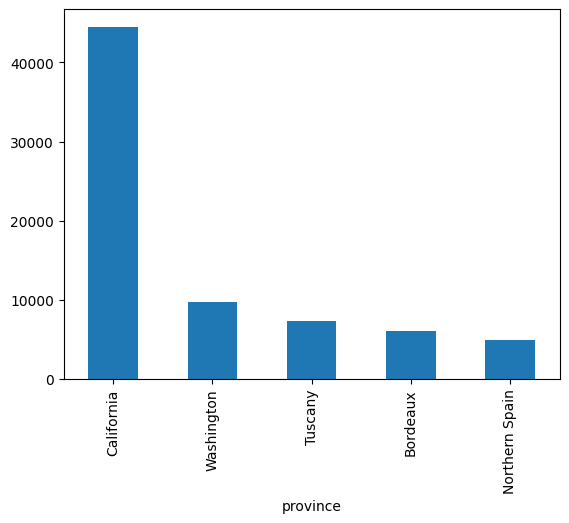

In [6]:
reviews['province'].value_counts().head(5).plot.bar()

<Axes: xlabel='province'>

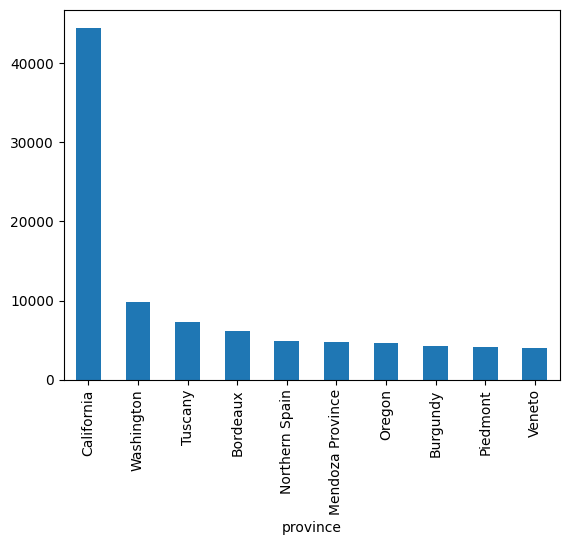

In [ ]:
reviews['province'].value_counts().head(10).plot.bar()

<Axes: xlabel='province'>

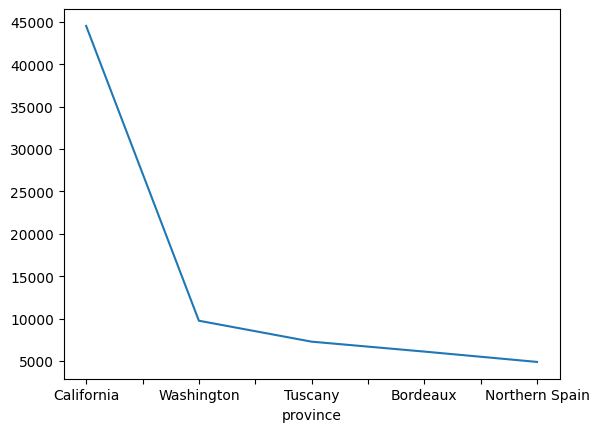

In [ ]:
reviews['province'].value_counts().head(5).plot.line()

What does this plot tell us? It says California produces far more wine than any other province of the world! We might ask what percent of the total is Californian vintage? This bar chart tells us absolute numbers, but it's more useful to know relative proportions. No problem:

In [7]:
len(reviews)

150930

In [ ]:
(reviews['province'].value_counts().head(10) / len(reviews))

,count
province,
California,0.294892
Washington,0.064599
Tuscany,0.048241
Bordeaux,0.040489
Northern Spain,0.032412
Mendoza Province,0.031419
Oregon,0.030405
Burgundy,0.028543
Piedmont,0.027119


<Axes: xlabel='province'>

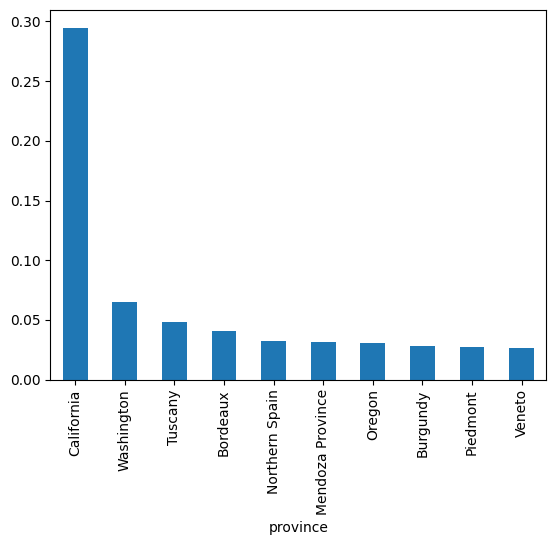

In [10]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

California produces almost a third of wines reviewed in Wine Magazine!

Bar charts are very flexible: The height can represent anything, as long as it is a number. And each bar can represent anything, as long as it is a category.

In this case the categories are **nominal categories**: "pure" categories that don't make a lot of sense to order. Nominal categorical variables include things like countries, ZIP codes, types of cheese, and lunar landers. The other kind are **ordinal categories**: things that do make sense to compare, like earthquake magnitudes, housing complexes with certain numbers of apartments, and the sizes of bags of chips at your local deli.

Or, in our case, the number of reviews of a certain score allotted by Wine Magazine:

In [11]:
reviews['points'].value_counts()

,count
points,
87,20747
88,17871
90,15973
86,15573
89,12921
85,12411
84,10708
91,10536
92,9241


In [12]:
reviews['points'].value_counts().sort_index()

,count
points,
80,898
81,1502
82,4041
83,6048
84,10708
85,12411
86,15573
87,20747
88,17871


<Axes: xlabel='points'>

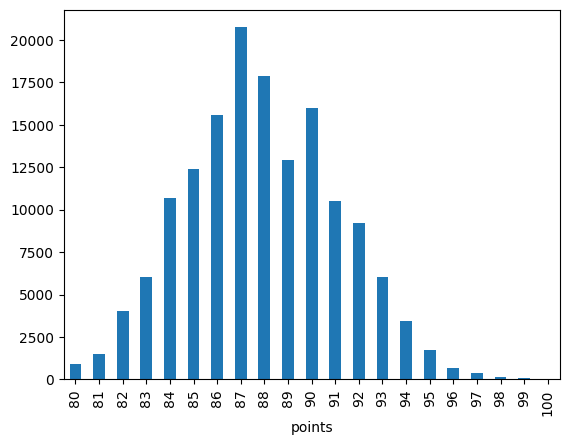

In [13]:
reviews['points'].value_counts().sort_index().plot.bar()

As you can see, every vintage is allotted an overall score between 80 and 100; and, if we are to believe that Wine Magazine is an arbiter of good taste, then a 92 is somehow meaningfully "better" than a 91.

## Line charts

The wine review scorecard has 20 different unique values to fill, for which our bar chart is just barely enough. What would we do if the magazine rated things 0-100? We'd have 100 different categories; simply too many to fit a bar in for each one!

In that case, instead of bar chart, we could use a line chart:

<Axes: xlabel='points'>

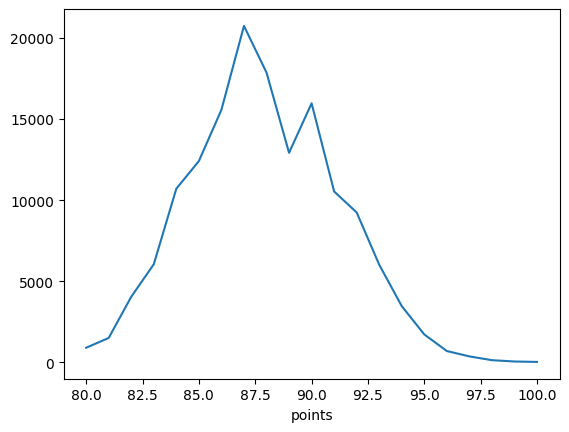

In [16]:
reviews['points'].value_counts().sort_index().plot.line()

<Axes: >

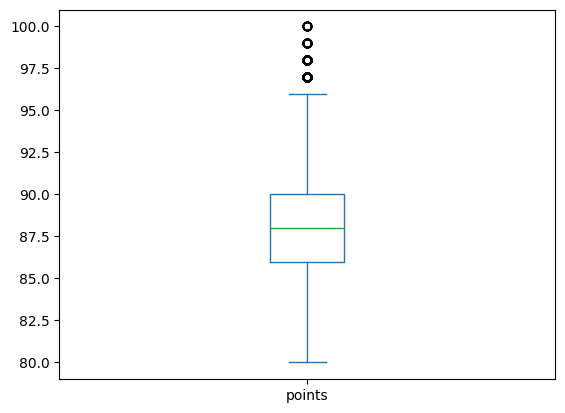

In [18]:
reviews['points'].plot.box()

A line chart can pass over any number of many individual values, making it the tool of first choice for distributions with many unique values or categories.

However, line charts have an important weakness: unlike bar charts, they're not appropriate for nominal categorical data. While bar charts distinguish between every "type" of point line charts mushes them together. So a line chart asserts an order to the values on the horizontal axis, and the order won’t make sense with some data. After all, a "descent" from California to Washington to Tuscany doesn't mean much!

Line charts also make it harder to distinguish between individual values.

In general, if your data can fit into a bar chart, just use a bar chart!

## Area charts

Area charts are just line charts, but with the bottom shaded in. That's it!

<Axes: xlabel='points'>

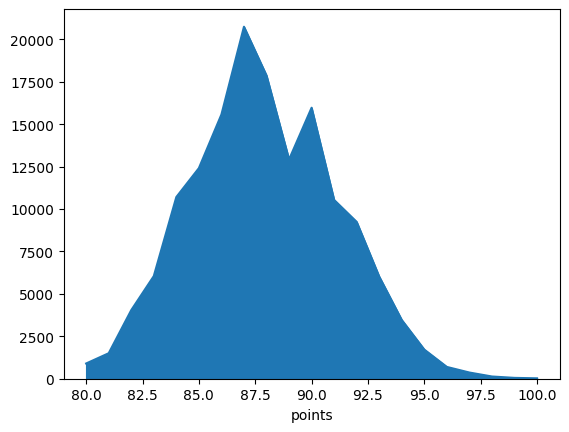

In [19]:
reviews['points'].value_counts().sort_index().plot.area()

When plotting only one variable, the difference between an area chart and a line chart is mostly visual. In this context, they can be used interchangably.

## Interval data

Let's move on by looking at yet another type of data, an **interval variable**.

Examples of interval variables are the wind speed in a hurricane, shear strength in concrete, and the temperature of the sun. An interval variable goes beyond an ordinal categorical variable: it has a *meaningful* order, in the sense that we can quantify what the difference between two entries is itself an interval variable.

For example, if I say that this sample of water is -20 degrees Celcius, and this other sample is 120 degrees Celcius, then I can quantify the difference between them: 140 degrees "worth" of heat, or such-and-such many joules of energy.

The difference can be qualitative sometimes. At a minimum, being able to state something so clearly feels a lot more "measured" than, say, saying you'll buy this wine and not that one, because this one scored a 92 on some taste test and that one only got an 85. More definitively, any variable that has infinitely many possible values is definitely an interval variable (why not 120.1 degrees? 120.001? 120.0000000001? Etc).

Line charts work well for interval data. Bar charts don't—unless your ability to measure it is very limited, interval data will naturally vary by quite a lot.

Let's apply a new tool, the histogram, to an interval variable in our dataset, price (we'll cut price off at 200$ a bottle; more on why shortly).

## Histograms

Here's a histogram:

In [20]:
[reviews['price'] < 200]

[0         False
 1          True
 2          True
 3          True
 4          True
           ...  
 150925     True
 150926     True
 150927     True
 150928     True
 150929     True
 Name: price, Length: 150930, dtype: bool]

In [ ]:
reviews[reviews['price'] < 200]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [21]:
reviews[reviews['price'] < 200]['price']

,price
1,110.0
2,90.0
3,65.0
4,66.0
5,73.0
...,...
150925,20.0
150926,27.0
150927,20.0
150928,52.0


<Axes: ylabel='Frequency'>

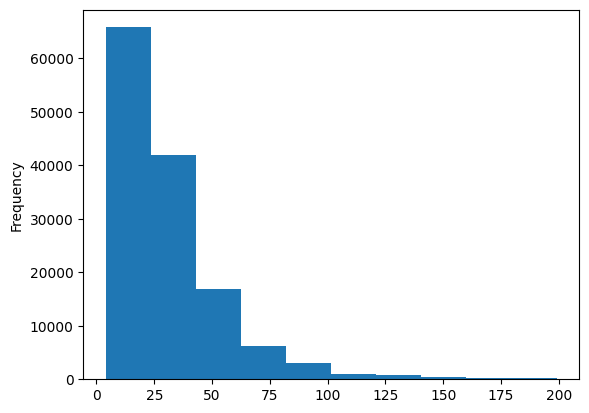

In [23]:
reviews[reviews['price'] < 200]['price'].plot.hist()

A histogram looks, trivially, like a bar plot. And it basically is! In fact, a histogram is special kind of bar plot that splits your data into even intervals and displays how many rows are in each interval with bars. The only analytical difference is that instead of each bar representing a single value, it represents a range of values.

However, histograms have one major shortcoming (the reason for our 200$ caveat earlier). Because they break space up into even intervals, they don't deal very well with skewed data:

This is the real reason I excluded the >$200 bottles earlier; some of these vintages are really expensive! And the chart will "grow" to include them, to the detriment of the rest of the data being shown.

In [ ]:
reviews[reviews['price'] > 1500]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
13318,13318,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Chardonnay,Blair
34920,34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour
34922,34922,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux


There are many ways of dealing with the skewed data problem; those are outside the scope of this tutorial. The easiest is to just do what I did: cut things off at a sensible level.

This phenomenon is known (statistically) as **skew**, and it's a fairly common occurance among interval variables.

Histograms work best for interval variables without skew. They also work really well for ordinal categorical variables like `points`:

<Axes: ylabel='Frequency'>

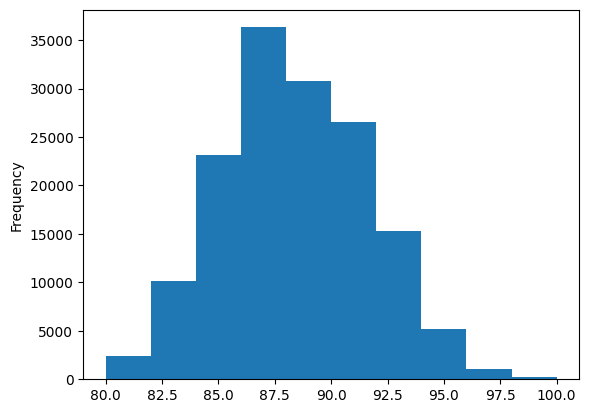

In [26]:
reviews['points'].plot.hist()